### Tangram annotation toturial         
The notebook introduces to mapping single cell data on spatial data using the Tangram method.         

#### * Import packages

In [1]:
import os
import sys
sys.path.append(os.getcwd())
import scanpy as sc
import numpy as np
import pandas as pd

import stereoAlign

Global seed set to 0


#### * loading scRNA dataset and SRT dataset

In [2]:
sc_data = sc.read_h5ad("demo_data/annotation/mop_sn_tutorial.h5ad")
st_data = sc.read_h5ad("demo_data/annotation/slideseq_MOp_1217.h5ad")

In [3]:
sc.pp.normalize_total(sc_data)

In [4]:
df_genes = pd.read_csv("demo_data/annotation/MOp_markers.csv", index_col=0)
markers = np.reshape(df_genes.values, (-1, ))
markers = list(markers)

#### * annotation by `tangram`

In [5]:
stereoAlign.ann.tangram_annotation(single_adata=sc_data, 
                                   spatial_adata=st_data,
                                   markers=markers,
                                   annotation="subclass_label",
                                   mode="cells",
                                   device ="cuda:0",
                                   perc=0.,
                                   verbose=True)

INFO:root:249 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:18000 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.
INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 249 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.103, KL reg: 0.558
Score: 0.781, KL reg: 0.014
Score: 0.808, KL reg: 0.006
Score: 0.813, KL reg: 0.005
Score: 0.815, KL reg: 0.005
Score: 0.816, KL reg: 0.005
Score: 0.817, KL reg: 0.005
Score: 0.817, KL reg: 0.005
Score: 0.818, KL reg: 0.005
Score: 0.818, KL reg: 0.005


INFO:root:Saving results..
INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


#### * visualization annotation results

In [9]:
annotation_types = sc_data.obs["subclass_label"].cat.categories.tolist()

In [12]:
st_data.obsm["spatial"] = st_data.obs[["x", "y"]].values

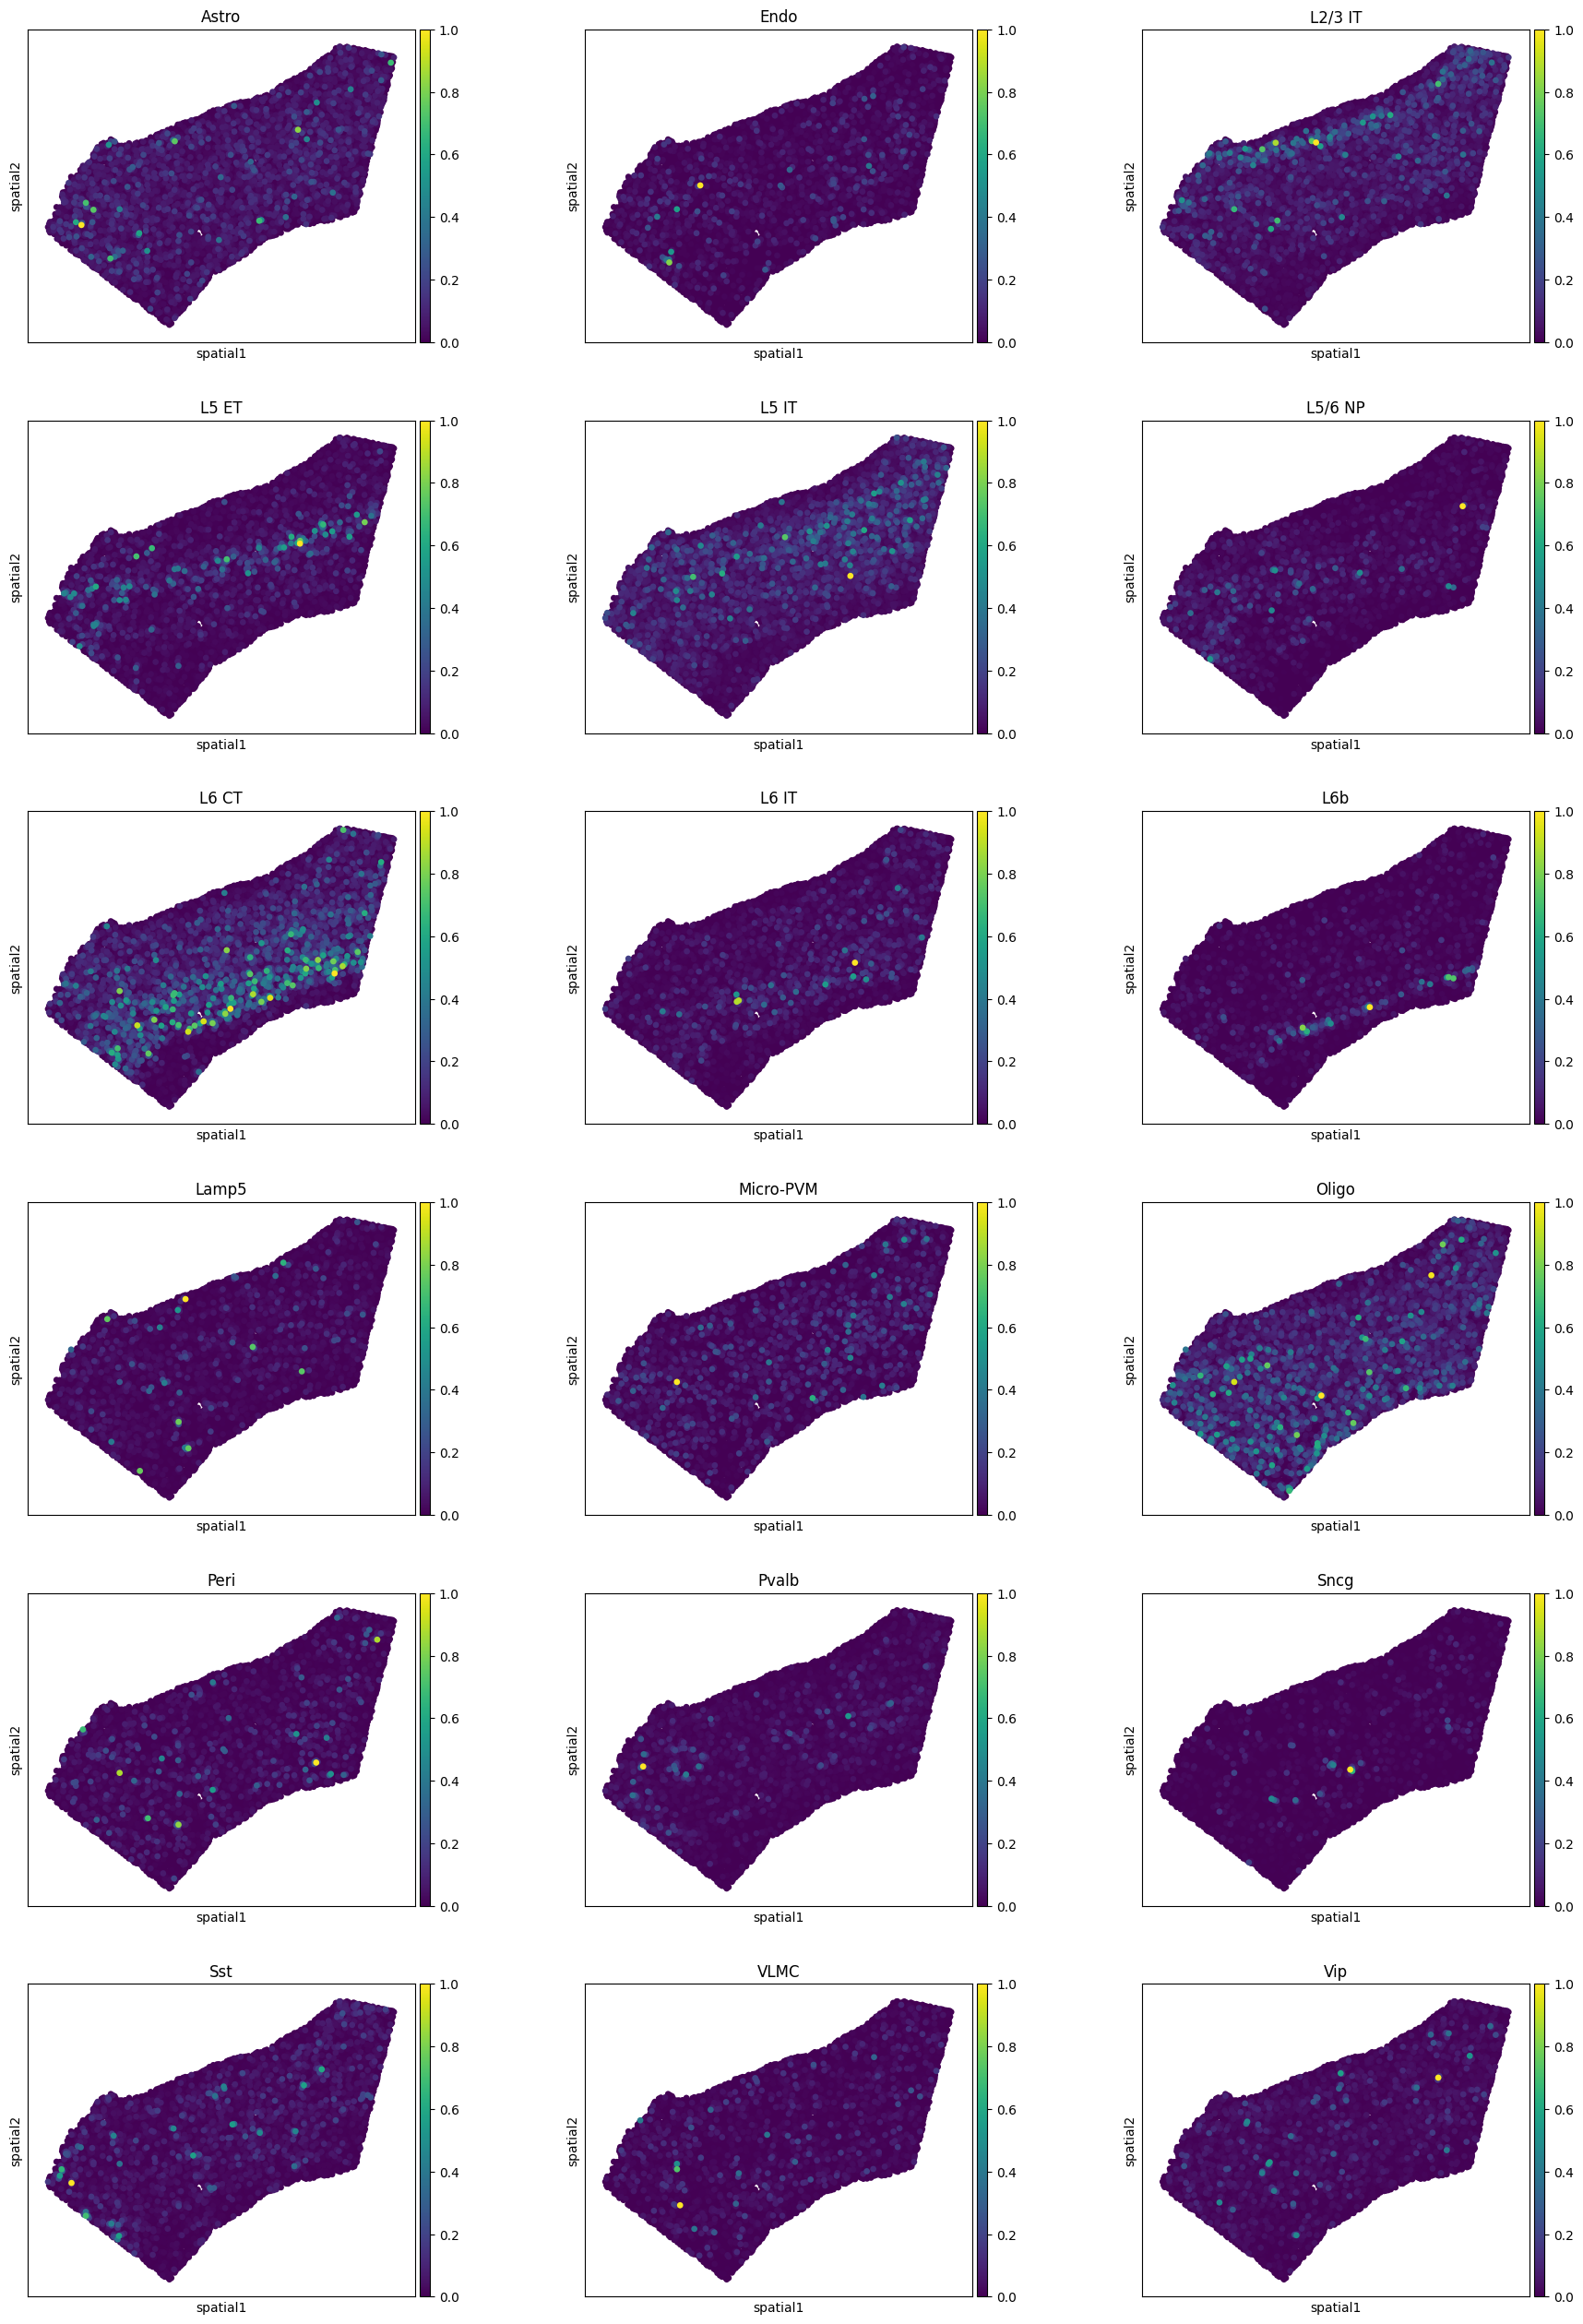

In [16]:
sc.pl.spatial(st_data, color=annotation_types, spot_size=50, ncols=3)